<a href="https://colab.research.google.com/github/Aliraza777/ML_Project_Alex/blob/main/MLathon_Alex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import pickle
import weakref
import cv2
import os
import tensorflow as tf
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
EPOCHS =10
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((227, 227))
directory_root = '/content/drive/MyDrive/Dataset_ML/Train'
width=227
height=227
depth=3
for folder in root_dir:
  print(folder)

Pepper__bell___Bacterial_spot
Pepper__bell___healthy


In [12]:
image_list, label_list = [], []
img_size=227
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
      print("Loading images from Folder : " ,directory)
      fp = os.path.join(directory_root,directory)
      for eachImage in os.listdir(fp):
        imagePath = os.path.join(fp,eachImage)
        img = cv2.imread(imagePath)
        resized = cv2.resize(img , (img_size , img_size))
        image_list.append(resized)
        label_list.append(directory)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
Loading images from Folder :  Pepper__bell___Bacterial_spot
Loading images from Folder :  Pepper__bell___healthy
[INFO] Image loading completed


In [13]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [14]:
np_image_list = np.array(image_list) / 255.0
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Spliting data to train, test


In [15]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [17]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.5))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.5))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(4069,activation="relu"))

model.add(Dropout(0.5))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))



In [18]:
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.optimizers.SGD(learning_rate=0.001),metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


In [20]:
history=model.fit(
         np_image_list,image_labels,
         validation_split=0.2,
          # aug.flow(x_train,y_train,batch_size=BS),
          epochs=EPOCHS,
          # validation_data=(x_test, y_test),
          validation_freq=1,
          )


Epoch 1/10
62/62 [==============================] - 145s 2s/step - loss: 0.6918 - accuracy: 0.8717 - val_loss: 0.2163 - val_accuracy: 0.9960
Epoch 2/10
62/62 [==============================] - 144s 2s/step - loss: 0.5257 - accuracy: 0.9111 - val_loss: 2.3225 - val_accuracy: 0.2586
Epoch 3/10
62/62 [==============================] - 145s 2s/step - loss: 0.3407 - accuracy: 0.9369 - val_loss: 7.9931 - val_accuracy: 0.0101
Epoch 4/10
62/62 [==============================] - 146s 2s/step - loss: 0.2432 - accuracy: 0.9556 - val_loss: 0.5803 - val_accuracy: 0.8687
Epoch 5/10
62/62 [==============================] - 146s 2s/step - loss: 0.2129 - accuracy: 0.9591 - val_loss: 0.8394 - val_accuracy: 0.8020
Epoch 6/10
62/62 [==============================] - 149s 2s/step - loss: 0.1676 - accuracy: 0.9717 - val_loss: 7.2317 - val_accuracy: 0.0828
Epoch 7/10
62/62 [==============================] - 145s 2s/step - loss: 0.1617 - accuracy: 0.9712 - val_loss: 1.0967 - val_accuracy: 0.7333
Epoch 8/10
62

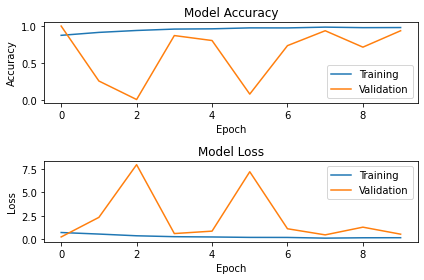

In [21]:
plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()

In [22]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
16/16 [==============================] - 7s 454ms/step - loss: 0.4699 - accuracy: 0.9475
Test Accuracy: 94.7474718093872


In [45]:
# save the model to disk
print("[INFO] Saving model...")
model.save('/content/drive/MyDrive/Dataset_ML/Detection/Models/CNN_MODEL2.h5')
print("[INFO] saved")


[INFO] Saving model...
[INFO] saved
